<a href="https://colab.research.google.com/github/Chahakgarg/Chahakgarg/blob/main/Chahak_Garg_House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Housing_Dataset.csv'
df = pd.read_csv(path)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df['mainroad']=df['mainroad'].str.replace('yes','1')
df['mainroad']=df['mainroad'].str.replace('no','0')

In [ ]:
df.mainroad

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: object

In [ ]:
df['mainroad']=df['mainroad'].astype(int)

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df['guestroom']=df['guestroom'].str.replace('yes','1')
df['guestroom']=df['guestroom'].str.replace('no','0')
df['guestroom']=df['guestroom'].astype(int)

In [ ]:
df.guestroom

0      0
1      0
2      0
3      0
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: guestroom, Length: 545, dtype: int64

In [ ]:
df['basement']=df['basement'].str.replace('yes','1')
df['basement']=df['basement'].str.replace('no','0')
df['basement']=df['basement'].astype(int)

In [ ]:
df['hotwaterheating']=df['hotwaterheating'].str.replace('yes','1')
df['hotwaterheating']=df['hotwaterheating'].str.replace('no','0')
df['hotwaterheating']=df['hotwaterheating'].astype(int)

In [ ]:
df['airconditioning']=df['airconditioning'].str.replace('yes','1')
df['airconditioning']=df['airconditioning'].str.replace('no','0')
df['airconditioning']=df['airconditioning'].astype(int)

In [ ]:
df['prefarea']=df['prefarea'].str.replace('yes','1')
df['prefarea']=df['prefarea'].str.replace('no','0')
df['prefarea']=df['prefarea'].astype(int)

In [ ]:
df['furnishingstatus']=df['furnishingstatus'].str.replace('unfurnished','0')
df['furnishingstatus']=df['furnishingstatus'].str.replace('semi-furnished','1')
df['furnishingstatus']=df['furnishingstatus'].str.replace('furnished','2')
df['furnishingstatus']=df['furnishingstatus'].astype(int)

In [ ]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
model = LinearRegression()

In [ ]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
len(X_train)

408

In [ ]:
len(X_test)

137

In [ ]:
len(y_train)

408

In [ ]:
len(y_test)

137

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train

array([[3240,    4,    1, ...,    1,    0,    1],
       [3500,    4,    1, ...,    2,    0,    0],
       [1950,    3,    1, ...,    0,    0,    0],
       ...,
       [4510,    4,    1, ...,    2,    0,    1],
       [5900,    4,    2, ...,    1,    0,    0],
       [3930,    2,    1, ...,    0,    0,    0]])

In [ ]:
X_train = np.reshape(X_train, (1632,3))

In [ ]:
X_train.ndim

2

In [ ]:
y_train.ndim

1

In [ ]:
model.fit(X_train.reshape(408,12), y_train)

LinearRegression()

In [ ]:
X_test = np.array([X_test])

In [ ]:
X_test.ndim

3

In [ ]:
X_test = np.reshape(X_test, (548,3))

In [ ]:
y_pred = model.predict(X_test.reshape(137,12))

In [ ]:
r2_score(y_test, y_pred)

0.6384032637963049

In [ ]:
predictions = model.predict(X_test.reshape(137,12))

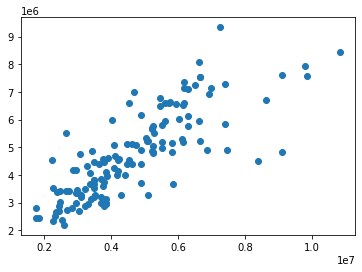

In [ ]:
plt.scatter(y_test, predictions)